In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 5s 81us/step - loss: 0.2651 - acc: 0.9229
Epoch 2/3
60000/60000 [==============================] - 5s 78us/step - loss: 0.1079 - acc: 0.9660
Epoch 3/3
60000/60000 [==============================] - 5s 77us/step - loss: 0.0734 - acc: 0.9771


In [2]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 32us/step
0.09029836793094874 0.9718


In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [4]:
model.save('epic_num_reader.model')

In [5]:
new_model=tf.keras.models.load_model('epic_num_reader.model')

In [6]:
predictions=new_model.predict([x_test])

In [7]:
print(predictions)

[[1.92087075e-08 8.59221473e-07 1.29731825e-05 ... 9.99973536e-01
  3.16301879e-07 2.50002995e-06]
 [8.53552090e-11 6.58894496e-05 9.99924421e-01 ... 3.62086361e-09
  5.16753380e-06 3.02618282e-12]
 [6.23948964e-08 9.99634266e-01 2.94540059e-05 ... 7.88622492e-05
  1.60950643e-04 1.36859398e-06]
 ...
 [4.40159109e-09 8.29928831e-06 9.84805553e-08 ... 2.80894514e-04
  4.94459891e-06 4.92816966e-04]
 [1.85691406e-05 1.68741713e-06 3.56089288e-07 ... 2.00339309e-06
  1.71313796e-03 9.20250400e-08]
 [5.08291400e-08 9.09437503e-09 6.99717688e-08 ... 2.29666321e-11
  9.99336649e-08 7.03736669e-09]]


In [8]:
import numpy as np

print(np.argmax(predictions[0]))

7


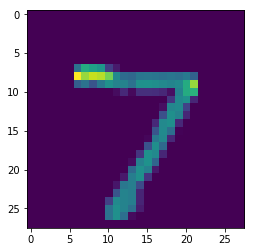

In [9]:
plt.imshow(x_test[0])
plt.show()